# Multiple Traveling Salesmen Problem with CVXPY

## (Single) Traveling Salesman problem

Example for a single Traveling Salesman

We are going to find the optimal paths (shortest distance) for a single salesman that starts from the point of origin (O) and must pass through all points A to F and return to point O.

| Point |	Coordinates |
| :----------: | :----------: |
| Origin(O) | (-12.059296, -76.975893) |
| A | (-12.079575, -77.009686) |
| B | (-12.087303, -76.996620) |
| C | (-12.084391, -76.975651) |
| D | (-12.063603, -76.960483) |
| E | (-12.056762, -77.014452) |
| F | (-12.011531, -77.002383) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from geopy import distance 

ModuleNotFoundError: No module named 'cvxpy'

In [8]:
# Original Data
################################################
points = [(-12.059296, -76.975893),
          (-12.079575, -77.009686),
          (-12.087303, -76.996620),
          (-12.084391, -76.975651),
          (-12.063603, -76.960483),
          (-12.056762, -77.014452),
          (-12.011531, -77.002383)]

################################################
# Building distance matrix
################################################
n = len(points)
D = np.zeros((n,n))

for i in range(0, n):
    for j in range(0, len(points)):
        D[i,j] = distance.distance(points[i], points[j]).km

In [9]:
# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(D, 4))

Distance Matrix is:

[[0.     4.3092 3.8329 2.7762 1.7441 4.2076 6.0199]
 [4.3092 0.     1.6596 3.7435 5.6408 2.5764 7.5691]
 [3.8329 1.6596 0.     2.3055 4.7278 3.8966 8.4056]
 [2.7762 3.7435 2.3055 0.     2.8311 5.2142 8.5694]
 [1.7441 5.6408 4.7278 2.8311 0.     5.9246 7.3483]
 [4.2076 2.5764 3.8966 5.2142 5.9246 0.     5.1733]
 [6.0199 7.5691 8.4056 8.5694 7.3483 5.1733 0.    ]]


$D$ is $n \times n$ symmetric matrix

In [10]:
import matplotlib.pyplot as plt

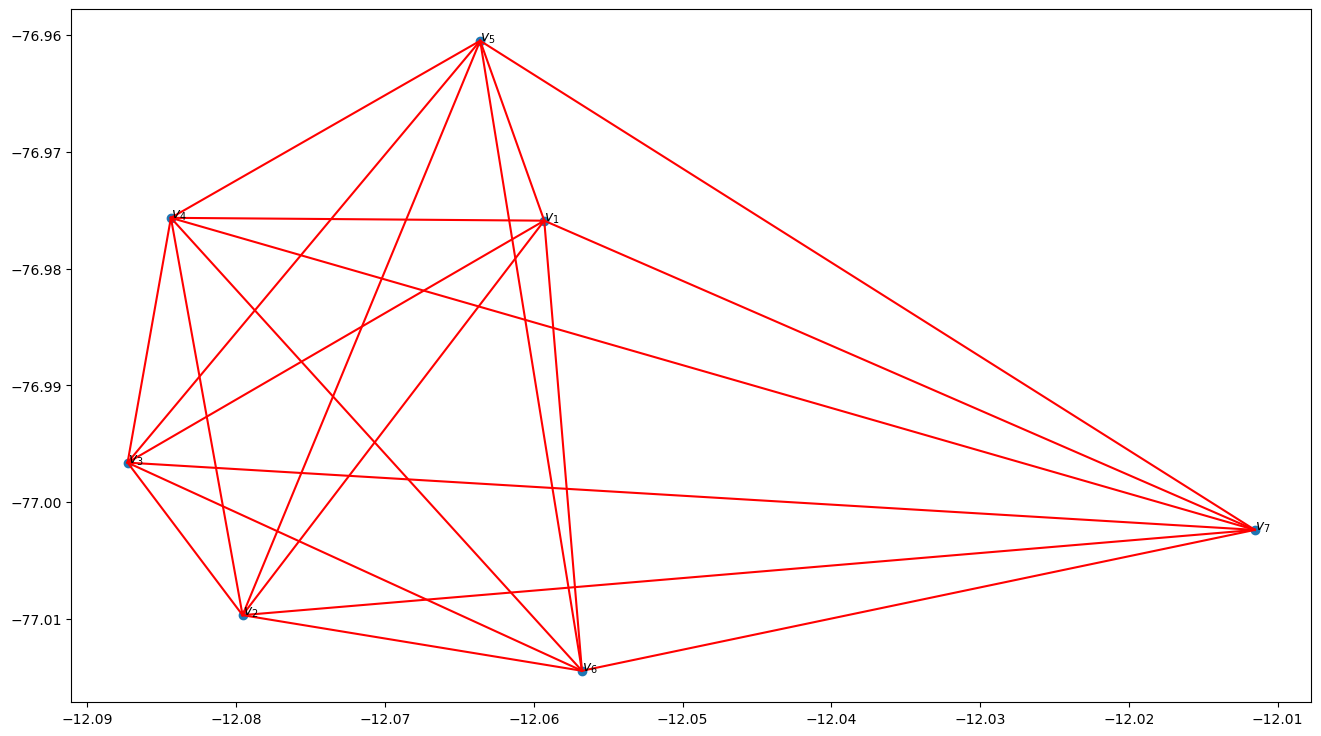

In [44]:
fig, ax = plt.subplots(figsize=(16, 9))
X = [coord[0] for coord in points]
y = [coord[1] for coord in points]
for i in range(len(X)):
    ax.text(X[i], y[i], '$v_{0}$'.format(i+1))
for i in range(len(points)-1):
    for j in range(i+1, len(points)):
        x_list = [points[i][0], points[j][0]]
        y_list = [points[i][1], points[j][1]]
        plt.plot(x_list, y_list, 'r-')
ax.scatter(X, y)
plt.show()

## Solve mixed-linear integer problem

In [28]:
X = cp.Variable(D.shape, boolean=True)
u = cp.Variable(n, integer=True)
ones = np.ones((n,1))

In [30]:
print(ones)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


#### Objective function


$$
f(X) = \sum_{i=1}^N\sum_{j=1}^N x_{ij}d_{ij}
$$

In [29]:
objective = cp.Minimize(cp.sum(cp.multiply(D, X)))

#### Define constraints

In [31]:
# Defining the constraints
constraints = []
constraints += [X @ ones == ones]
constraints += [X.T @ ones == ones]
constraints += [cp.diag(X) == 0]
constraints += [u[1:] >= 2]
constraints += [u[1:] <= n]
constraints += [u[0] == 1]

for i in range(1, n):
    for j in range(1, n):
        if i != j:
            constraints += [ u[i] - u[j] + 1  <= (n - 1) * (1 - X[i, j]) ]

#### Solve the problem

In [32]:
prob = cp.Problem(objective, constraints)
prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Nov 10 03:03:33 PM: Your problem has 56 variables, 36 constraints, and 0 parameters.
(CVXPY) Nov 10 03:03:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 10 03:03:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 10 03:03:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 10 03:03:33 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 10 03:03:33 PM: Compiling problem (target solver=SCIPY).
(C

22.31000388184043

#### Gathering the paths

In [34]:
# Transforming the solution to a path
X_sol = np.argwhere(X.value==1)
orden = X_sol[0].tolist()

for i in range(1, n):
    row = orden[-1]
    orden.append(X_sol[row,1])

# Showing the optimal path
print('The path is:\n')
print( ' => '.join(map(str, orden)))

The path is:

0 => 4 => 3 => 2 => 1 => 5 => 6 => 0


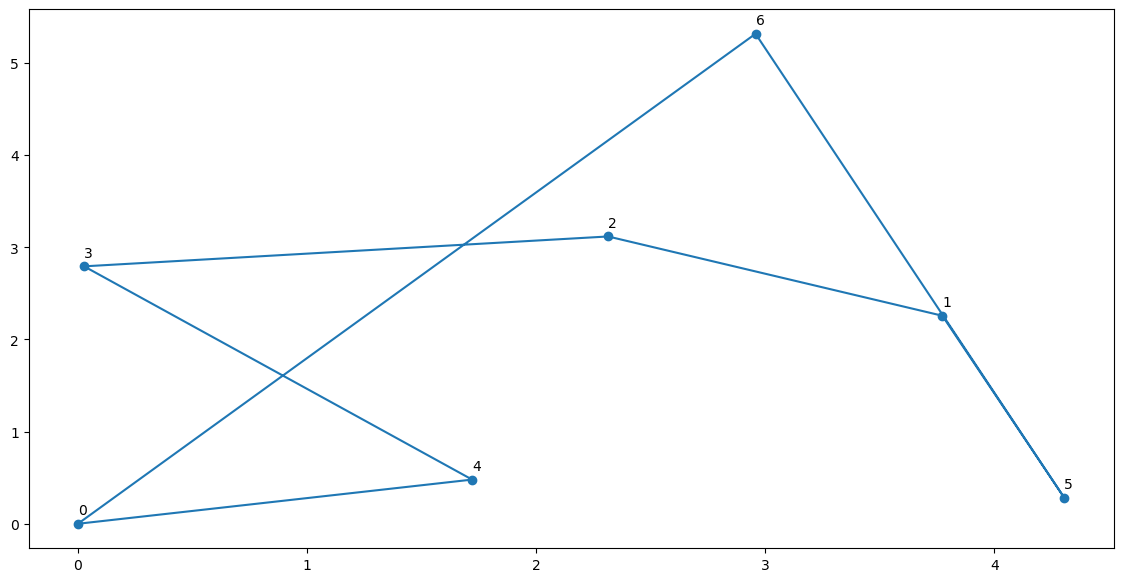

In [35]:
xy_cords = np.zeros((n,2))

for i in range(0, n):
    xy_cords[i,0] = distance.distance((points[0][1],0), (points[i][1],0)).km
    xy_cords[i,1] = distance.distance((0,points[0][0]), (0,points[i][0])).km

# Plotting the points
fig, ax = plt.subplots(figsize=(14,7))

for i in range(n):
    ax.annotate(str(i), xy=(xy_cords[i,0], xy_cords[i,1]+0.1))
    
ax.scatter(xy_cords[:,0],xy_cords[:,1])
ax.plot(xy_cords[orden,0], xy_cords[orden,1])

## Example for three Traveling Salesmen

### Defining the variables

In [58]:
X = cp.Variable(D.shape, boolean=True)
u = cp.Variable(n, integer=True)
m = 2
ones = np.ones((n,1))

### Define objective

In [59]:
objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

#### Define constraint

In [60]:
constraints = []
constraints += [X[0,:] @ ones == m]
constraints += [X[:,0] @ ones == m]
constraints += [X[1:,:] @ ones == 1]
constraints += [X[:,1:].T @ ones == 1]
constraints += [cp.diag(X) == 0]
constraints += [u[1:] >= 2]
constraints += [u[1:] <= n]
constraints += [u[0] == 1]

for i in range(1, n):
    for j in range(1, n):
        if i != j:
            constraints += [ u[i] - u[j] + 1  <= (n - 1) * (1 - X[i, j])]

### Solve the problem

In [61]:
prob = cp.Problem(objective, constraints)
prob.solve(verbose=False)

23.999215890973886

In [62]:
print(X.value)

[[0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [63]:
print(u.value)

[1. 4. 5. 6. 2. 3. 2.]


#### Transform to optimal path

In [64]:
# Transforming the solution to paths
X_sol = np.argwhere(X.value==1)

ruta = {}
for i in range(0, m):
    ruta['Salesman_' + str(i+1)] = [0]
    j = i
    a = 10e10
    while a != 0:
        a = X_sol[j,1]
        ruta['Salesman_' + str(i+1)].append(a)
        j = np.where(X_sol[:,0] == a)
        j = j[0][0]
        a = j
        
# Showing the paths
for i in ruta.keys():
    print('The path of ' + i + ' is:\n')
    print( ' => '.join(map(str, ruta[i])))
    print('')

The path of Salesman_1 is:

0 => 4 => 0

The path of Salesman_2 is:

0 => 6 => 5 => 1 => 2 => 3 => 0



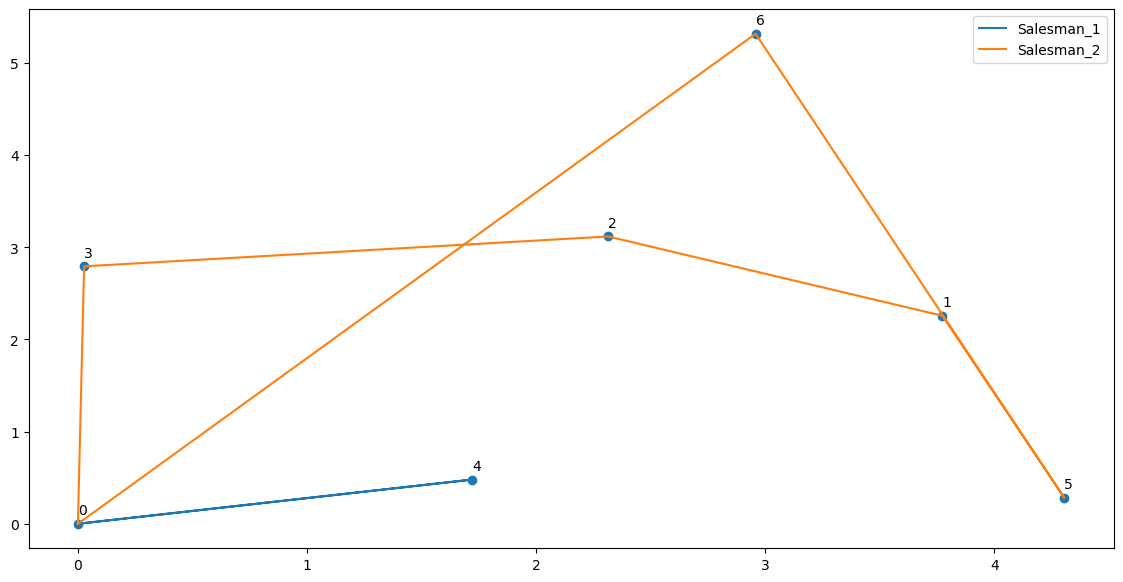

In [65]:
################################################
# Plotting the optimal path
################################################
fig, ax = plt.subplots(figsize=(14,7))

for i in range(n):
    ax.annotate(str(i), xy=(xy_cords[i,0], xy_cords[i,1]+0.1))

ax.scatter(xy_cords[:,0],xy_cords[:,1])
for i in ruta.keys():
    ax.plot(xy_cords[ruta[i],0], xy_cords[ruta[i],1], label = i)
    ax.legend(loc='best')